In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import yfinance as yf

In [4]:
data = pd.read_csv('../../00 Data Preprocessing/Input/Company Classification.csv')
data['Code'] = data['Code'].astype(str)
data.head()

,Code,Sector,Name
0,1101,Basic Materials,台泥
1,1102,Basic Materials,亞泥
2,1103,Basic Materials,嘉泥
3,1104,Basic Materials,環泥
4,1108,Basic Materials,幸福


In [5]:
Cap = pd.read_excel('../../00 Data Preprocessing/Input/Capitalization.xlsx', header=2)
Cap = Cap.transpose()
Cap.columns = Cap.iloc[0]
Cap = Cap.iloc[1:]
Cap.columns = [col.split(' ')[0] for col in Cap.columns]
Cap = Cap.apply(pd.to_numeric, errors='coerce')
Cap.index = pd.to_datetime(Cap.index)
print(Cap.iloc[:, :8].head())

              1101    1102   1103   1104  1108  1109   1110   1201
2023-12-29  263159  147005  15054  19995  6395  6226  10754   9640
2023-09-28  237943  140976  14659  17537  5828  6056  10725   9337
2023-06-30  272293  157467  16658  20066  6881  6311  11011  10273
2023-03-31  260485  153539  14682  17321  5727  5817  10039  10121
2022-12-30  240806  145383  13481  14510  4351  5339  10696   9640


In [6]:
data_filtered = data[data['Code'].isin(Cap.columns)]
Cap = Cap[data_filtered['Code']]
Cap_sector = Cap.T.groupby(data_filtered.set_index('Code')['Sector']).sum().T
Cap_sector = Cap_sector[['Electronic', 'Financial', 'Industrials', 'Basic Materials', 'Consumer Cyclical', 'Communication Services', 'Consumer Defensive', 'Real Estate', 'Healthcare', 'Utilities']]
Cap_sector /= 1000000
Cap_sector.head()

Sector,Electronic,Financial,Industrials,Basic Materials,Consumer Cyclical,Communication Services,Consumer Defensive,Real Estate,Healthcare,Utilities
2023-12-29,33.750993,6.887752,4.319506,3.670448,3.259366,1.617421,1.080846,0.670816,0.476976,0.062111
2023-09-28,29.781644,6.464812,4.009742,3.541605,3.112929,1.529227,1.034282,0.603815,0.463242,0.062613
2023-06-30,30.432500,6.477119,4.309295,3.810187,3.386281,1.560327,1.105785,0.595451,0.508017,0.064378
2023-03-31,28.073667,6.114652,4.045243,3.839243,3.066544,1.591709,1.052543,0.564396,0.486210,0.056544
2022-12-30,23.724588,5.933495,3.709745,3.647193,2.865498,1.486154,1.005246,0.534622,0.440298,0.055669


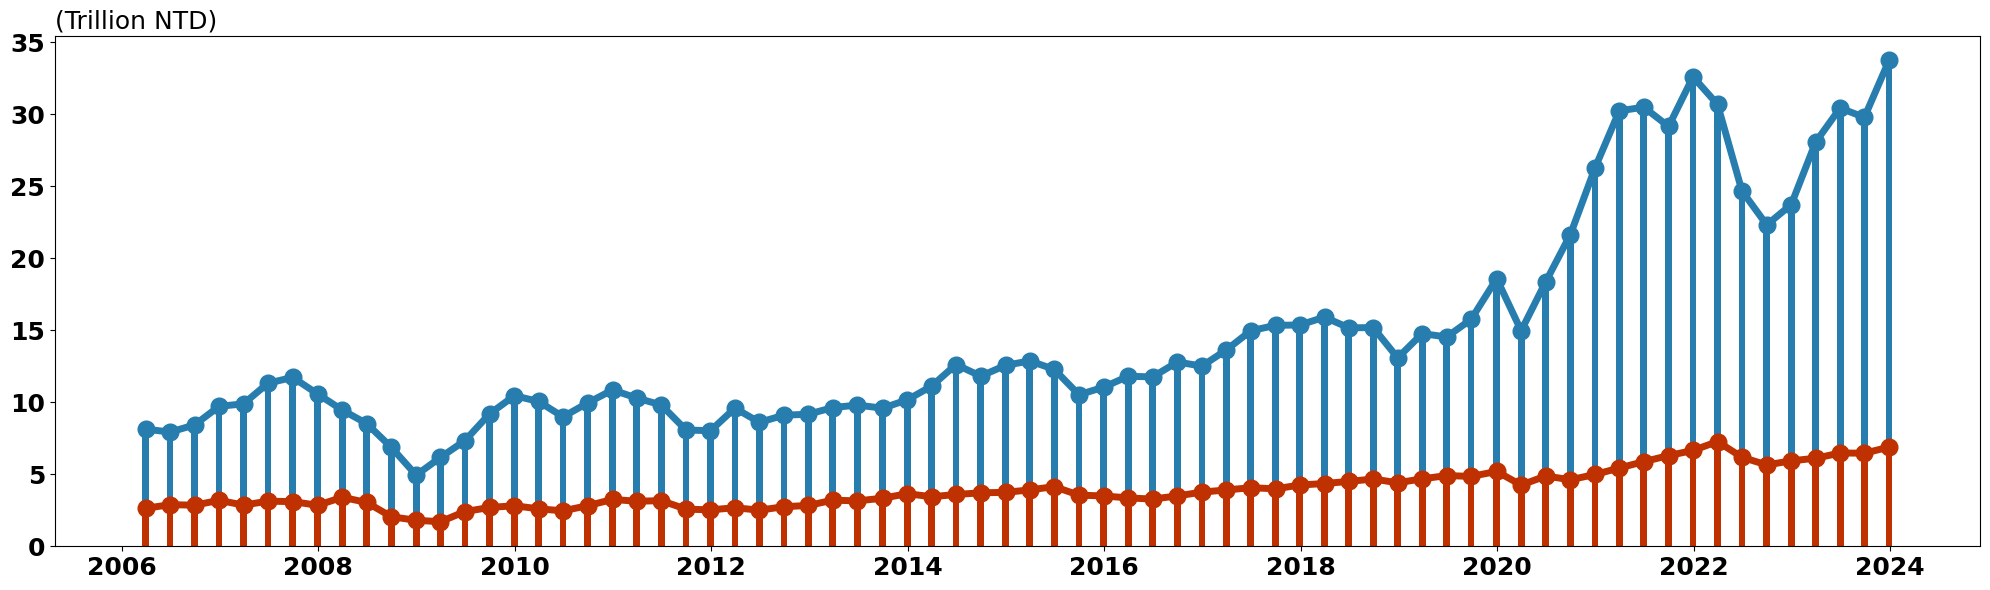

In [40]:
formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)

colors = ['#277DAE', '#BF3100', '#EE9B00', '#E9D8A6', '#94D2BD', '#64A47F', '#0A9396', '#40E0D0', 'darkgray', 'gray']
width = 25

plt.figure(figsize=(20, 6))
plt.bar(Cap_sector.index, Cap_sector['Electronic'], label='Electronic', color=colors[0], width=width, alpha=1)
plt.bar(Cap_sector.index, Cap_sector['Financial'], label='Financial', color=colors[1], width=width, alpha=1)
# plt.bar(Cap_sector.index, Cap_sector['Basic Materials'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'], label='Basic Materials', color=colors[2], width=width)
# plt.bar(Cap_sector.index, Cap_sector['Industrials'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'] + Cap_sector['Basic Materials'], label='Industrials', color=colors[3], width=width)
# plt.bar(Cap_sector.index, Cap_sector['Consumer Cyclical'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'] + Cap_sector['Basic Materials'] + Cap_sector['Industrials'], label='Consumer Cyclical', color=colors[4], width=width)
# plt.bar(Cap_sector.index, Cap_sector['Communication Services'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'] + Cap_sector['Basic Materials'] + Cap_sector['Industrials'] + Cap_sector['Consumer Cyclical'], label='Communication Services', color=colors[5], width=width)
# plt.bar(Cap_sector.index, Cap_sector['Healthcare'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'] + Cap_sector['Basic Materials'] + Cap_sector['Industrials'] + Cap_sector['Consumer Cyclical'] + Cap_sector['Communication Services'], label='Healthcare', color=colors[6], width=width)
# plt.bar(Cap_sector.index, Cap_sector['Utilities'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'] + Cap_sector['Basic Materials'] + Cap_sector['Industrials'] + Cap_sector['Consumer Cyclical'] + Cap_sector['Communication Services'] + Cap_sector['Healthcare'], label='Utilities', color=colors[7], width=width)
# plt.bar(Cap_sector.index, Cap_sector['Real Estate'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'] + Cap_sector['Basic Materials'] + Cap_sector['Industrials'] + Cap_sector['Consumer Cyclical'] + Cap_sector['Communication Services'] + Cap_sector['Healthcare'] + Cap_sector['Utilities'], label='Real Estate', color=colors[8], width=width)
# plt.bar(Cap_sector.index, Cap_sector['Consumer Defensive'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'] + Cap_sector['Basic Materials'] + Cap_sector['Industrials'] + Cap_sector['Consumer Cyclical'] + Cap_sector['Communication Services'] + Cap_sector['Healthcare'] + Cap_sector['Utilities'] + Cap_sector['Real Estate'], label='Consumer Defensive', color='gray', width=width)

# plt.axhline(y=Cap_sector['Electronic'].iloc[-1], color='black', linestyle='--', linewidth=1.5, label='Electronic Initial Value')
# plt.axhline(y=Cap_sector['Financial'].iloc[-1], color='black', linestyle='--', linewidth=1.5, label='Financial Initial Value')

plt.plot(Cap_sector.index, Cap_sector['Electronic'], marker='o', color=colors[0], linestyle='-', linewidth=5, markersize=12, label='Electronic Trend')
plt.plot(Cap_sector.index, Cap_sector['Financial'], marker='o', color=colors[1], linestyle='-', linewidth=5, markersize=12, label='Financial Trend')

plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')

plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().annotate('(Trillion NTD)', xy=(0.0, 1.0), xycoords='axes fraction', fontsize=18, xytext=(0, 5), textcoords='offset points', ha='left', va='baseline')

plt.tight_layout()
plt.savefig('Cap Sector Barplot.png', dpi=144, transparent=True)
plt.show()

[*********************100%%**********************]  1 of 1 completed


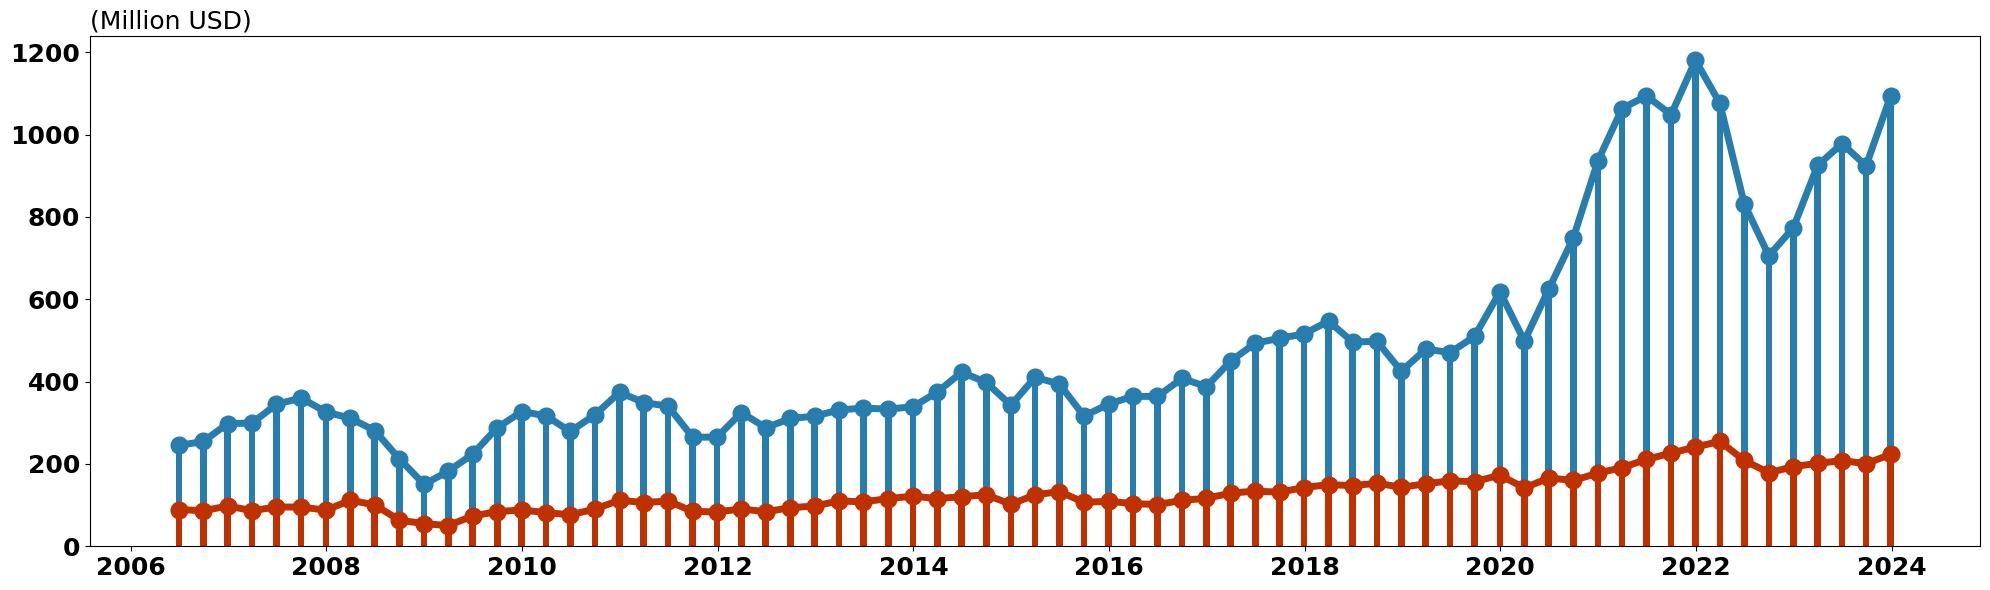

In [67]:
start_date = Cap_sector.index.min().strftime('%Y-%m-%d')
end_date = Cap_sector.index.max().strftime('%Y-%m-%d')
exchange_rate = yf.download('TWD=X', start=start_date, end=end_date)
exchange_rate = exchange_rate['Close']
exchange_rate = exchange_rate.reindex(Cap_sector.index, method='ffill')
####################################################
exchange_rate.iloc[36] = exchange_rate.iloc[36] * 10
####################################################

Cap_sector_usd = Cap_sector.div(exchange_rate, axis=0) * 1000

formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)

colors = ['#277DAE', '#BF3100', '#EE9B00', '#E9D8A6', '#94D2BD', '#64A47F', '#0A9396', '#40E0D0', 'darkgray', 'gray']
width = 25

plt.figure(figsize=(20, 6))
plt.bar(Cap_sector_usd.index, Cap_sector_usd['Electronic'], label='Electronic',
        color=colors[0], width=width, alpha=1)
plt.bar(Cap_sector_usd.index, Cap_sector_usd['Financial'], label='Financial',
        color=colors[1], width=width, alpha=1)

plt.plot(Cap_sector_usd.index, Cap_sector_usd['Electronic'], marker='o', color=colors[0],
         linestyle='-', linewidth=5, markersize=12, label='Electronic Trend')
plt.plot(Cap_sector_usd.index, Cap_sector_usd['Financial'], marker='o', color=colors[1],
         linestyle='-', linewidth=5, markersize=12, label='Financial Trend')

plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')

plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().annotate('(Million USD)', xy=(0.0, 1.0), xycoords='axes fraction',
                   fontsize=18, xytext=(0, 5), textcoords='offset points',
                   ha='left', va='baseline')

plt.tight_layout()
plt.savefig('Cap Sector Barplot USD.png', dpi=144, transparent=True)
plt.show()

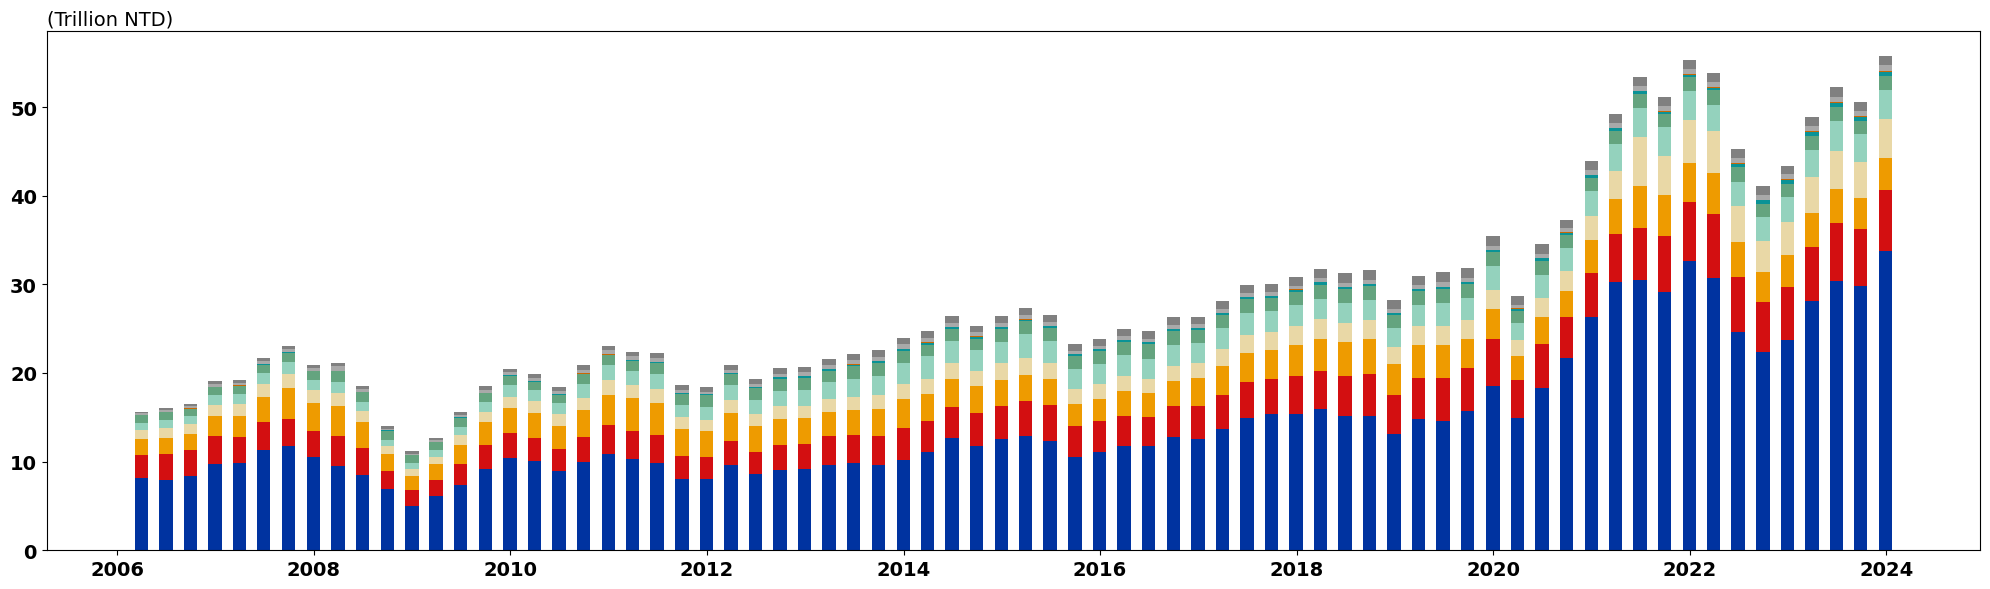

In [22]:
formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)

colors = ['#0033A0', '#D30F11', '#EE9B00', '#E9D8A6', '#94D2BD', '#64A47F', '#0A9396', '#CA6702', 'darkgray', 'gray']
width = 50

plt.figure(figsize=(20, 6))
plt.bar(Cap_sector.index, Cap_sector['Electronic'], label='Electronic', color=colors[0], width=width)
plt.bar(Cap_sector.index, Cap_sector['Financial'], bottom=Cap_sector['Electronic'], label='Financial', color=colors[1], width=width)
plt.bar(Cap_sector.index, Cap_sector['Basic Materials'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'], label='Basic Materials', color=colors[2], width=width)
plt.bar(Cap_sector.index, Cap_sector['Industrials'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'] + Cap_sector['Basic Materials'], label='Industrials', color=colors[3], width=width)
plt.bar(Cap_sector.index, Cap_sector['Consumer Cyclical'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'] + Cap_sector['Basic Materials'] + Cap_sector['Industrials'], label='Consumer Cyclical', color=colors[4], width=width)
plt.bar(Cap_sector.index, Cap_sector['Communication Services'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'] + Cap_sector['Basic Materials'] + Cap_sector['Industrials'] + Cap_sector['Consumer Cyclical'], label='Communication Services', color=colors[5], width=width)
plt.bar(Cap_sector.index, Cap_sector['Healthcare'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'] + Cap_sector['Basic Materials'] + Cap_sector['Industrials'] + Cap_sector['Consumer Cyclical'] + Cap_sector['Communication Services'], label='Healthcare', color=colors[6], width=width)
plt.bar(Cap_sector.index, Cap_sector['Utilities'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'] + Cap_sector['Basic Materials'] + Cap_sector['Industrials'] + Cap_sector['Consumer Cyclical'] + Cap_sector['Communication Services'] + Cap_sector['Healthcare'], label='Utilities', color=colors[7], width=width)
plt.bar(Cap_sector.index, Cap_sector['Real Estate'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'] + Cap_sector['Basic Materials'] + Cap_sector['Industrials'] + Cap_sector['Consumer Cyclical'] + Cap_sector['Communication Services'] + Cap_sector['Healthcare'] + Cap_sector['Utilities'], label='Real Estate', color=colors[8], width=width)
plt.bar(Cap_sector.index, Cap_sector['Consumer Defensive'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'] + Cap_sector['Basic Materials'] + Cap_sector['Industrials'] + Cap_sector['Consumer Cyclical'] + Cap_sector['Communication Services'] + Cap_sector['Healthcare'] + Cap_sector['Utilities'] + Cap_sector['Real Estate'], label='Consumer Defensive', color='gray', width=width)

plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().annotate('(Trillion NTD)', xy=(0.0, 1.0), xycoords='axes fraction', fontsize=14, xytext=(0, 5), textcoords='offset points', ha='left', va='baseline')

plt.tight_layout()
# plt.savefig('cap_sector_bar.png', dpi=144, transparent=True)
plt.show()

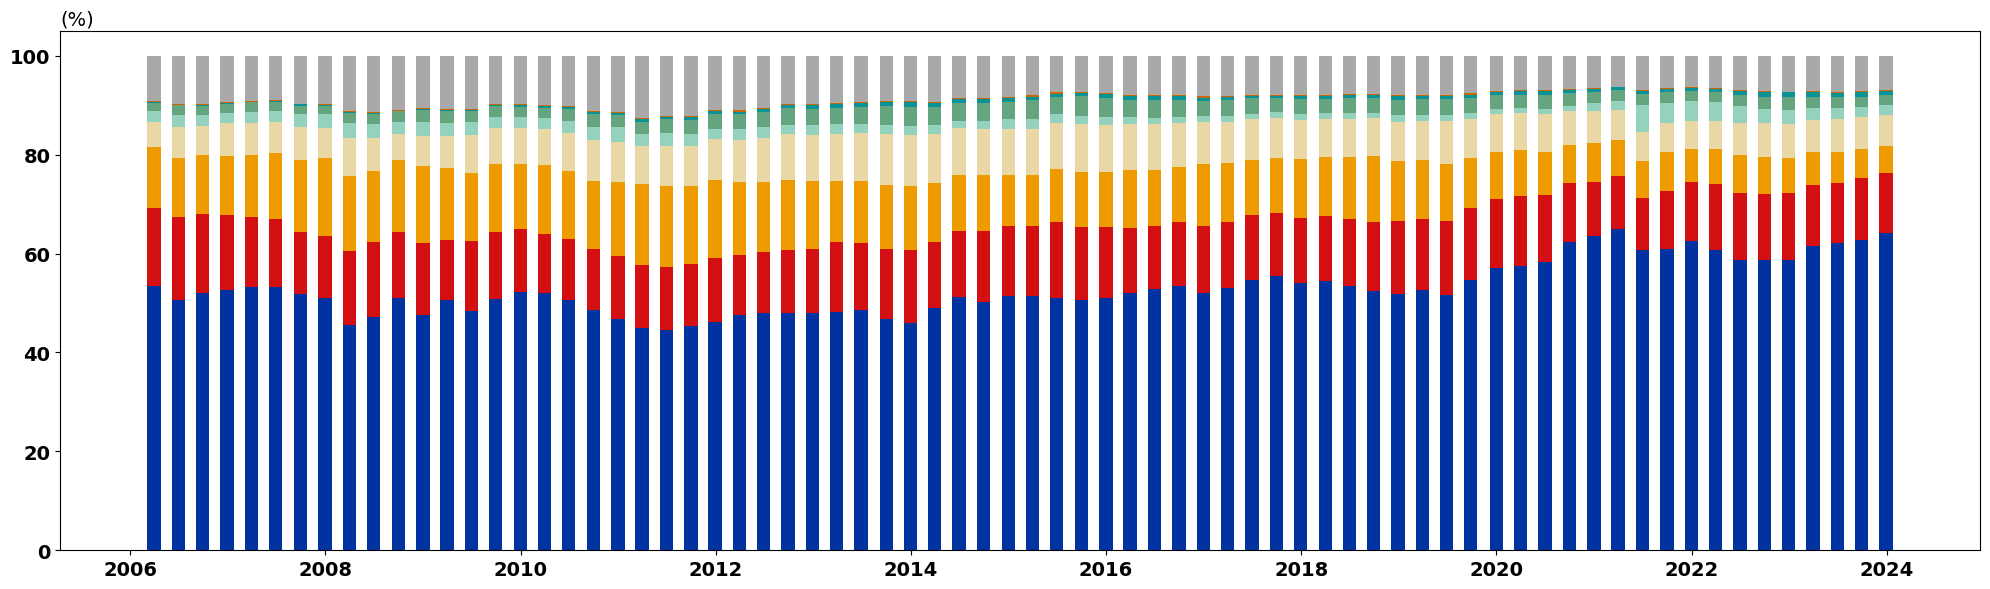

In [245]:
Cap_sector_percent = Cap_sector.copy()
total = Cap_sector_percent[['Electronic', 'Financial', 'Materials', 'Manufacturing', 'Transportation', 'Service', 'Medical', 'Energy', 'Other']].sum(axis=1)

Cap_sector_percent['Electronic'] = (Cap_sector_percent['Electronic'] / total) * 100
Cap_sector_percent['Financial'] = (Cap_sector_percent['Financial'] / total) * 100
Cap_sector_percent['Materials'] = (Cap_sector_percent['Materials'] / total) * 100
Cap_sector_percent['Manufacturing'] = (Cap_sector_percent['Manufacturing'] / total) * 100
Cap_sector_percent['Transportation'] = (Cap_sector_percent['Transportation'] / total) * 100
Cap_sector_percent['Service'] = (Cap_sector_percent['Service'] / total) * 100
Cap_sector_percent['Medical'] = (Cap_sector_percent['Medical'] / total) * 100
Cap_sector_percent['Energy'] = (Cap_sector_percent['Energy'] / total) * 100
Cap_sector_percent['Other'] = (Cap_sector_percent['Other'] / total) * 100

colors = ['#0033A0', '#D30F11', '#EE9B00', '#E9D8A6', '#94D2BD', '#64A47F', '#0A9396', '#CA6702']
width = 50
alpha = 1

plt.figure(figsize=(20, 6))
plt.bar(Cap_sector.index, Cap_sector_percent['Electronic'], label='Electronic', color=colors[0], width=width, alpha=alpha)
plt.bar(Cap_sector.index, Cap_sector_percent['Financial'], bottom=Cap_sector_percent['Electronic'], label='Financial', color=colors[1], width=width, alpha=alpha)
plt.bar(Cap_sector.index, Cap_sector_percent['Materials'], bottom=Cap_sector_percent['Electronic'] + Cap_sector_percent['Financial'], label='Materials', color=colors[2], width=width, alpha=alpha)
plt.bar(Cap_sector.index, Cap_sector_percent['Manufacturing'], bottom=Cap_sector_percent['Electronic'] + Cap_sector_percent['Financial'] + Cap_sector_percent['Materials'], label='Manufacturing', color=colors[3], width=width, alpha=alpha)
plt.bar(Cap_sector.index, Cap_sector_percent['Transportation'], bottom=Cap_sector_percent['Electronic'] + Cap_sector_percent['Financial'] + Cap_sector_percent['Materials'] + Cap_sector_percent['Manufacturing'], label='Transportation', color=colors[4], width=width, alpha=alpha)
plt.bar(Cap_sector.index, Cap_sector_percent['Service'], bottom=Cap_sector_percent['Electronic'] + Cap_sector_percent['Financial'] + Cap_sector_percent['Materials'] + Cap_sector_percent['Manufacturing'] + Cap_sector_percent['Transportation'], label='Service', color=colors[5], width=width, alpha=alpha)
plt.bar(Cap_sector.index, Cap_sector_percent['Medical'], bottom=Cap_sector_percent['Electronic'] + Cap_sector_percent['Financial'] + Cap_sector_percent['Materials'] + Cap_sector_percent['Manufacturing'] + Cap_sector_percent['Transportation'] + Cap_sector_percent['Service'], label='Medical', color=colors[6], width=width, alpha=alpha)
plt.bar(Cap_sector.index, Cap_sector_percent['Energy'], bottom=Cap_sector_percent['Electronic'] + Cap_sector_percent['Financial'] + Cap_sector_percent['Materials'] + Cap_sector_percent['Manufacturing'] + Cap_sector_percent['Transportation'] + Cap_sector_percent['Service'] + Cap_sector_percent['Medical'], label='Energy', color=colors[7], width=width, alpha=alpha)
plt.bar(Cap_sector.index, Cap_sector_percent['Other'], bottom=Cap_sector_percent['Electronic'] + Cap_sector_percent['Financial'] + Cap_sector_percent['Materials'] + Cap_sector_percent['Manufacturing'] + Cap_sector_percent['Transportation'] + Cap_sector_percent['Service'] + Cap_sector_percent['Medical'] + Cap_sector_percent['Energy'], label='Other', color='darkgray', width=width, alpha=alpha)

plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().annotate('(%)', xy=(0.0, 1.0), xycoords='axes fraction', fontsize=14, xytext=(0, 5), textcoords='offset points', ha='left', va='baseline')

plt.tight_layout()
# plt.savefig('cap_sector_bar_percent.png', dpi=144, transparent=True)
plt.show()


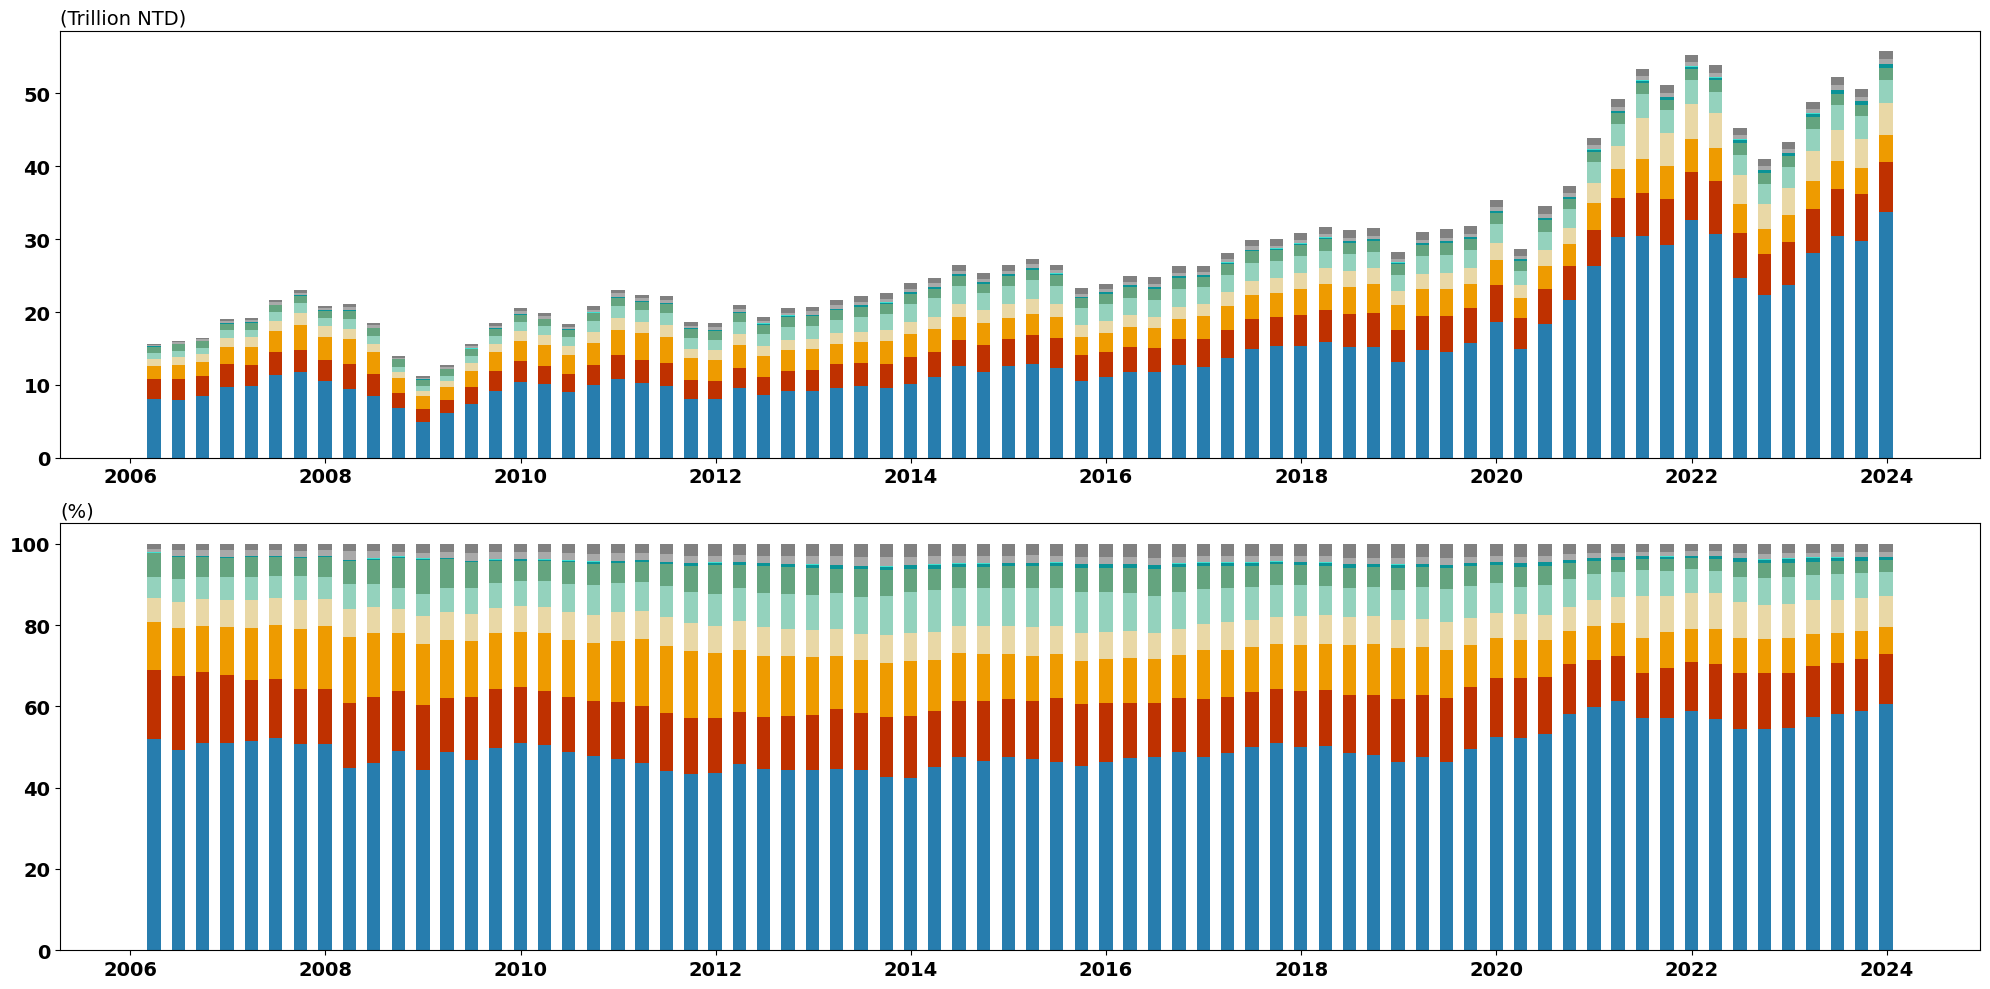

In [24]:
formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)

colors = ['#277DAE', '#BF3100', '#EE9B00', '#E9D8A6', '#94D2BD', '#64A47F', '#0A9396', '#40E0D0', 'darkgray', 'gray']
width = 50

plt.figure(figsize=(20, 10))

####################
plt.subplot(2, 1, 1)
plt.bar(Cap_sector.index, Cap_sector['Electronic'], label='Electronic', color=colors[0], width=width)
plt.bar(Cap_sector.index, Cap_sector['Financial'], bottom=Cap_sector['Electronic'], label='Financial', color=colors[1], width=width)
plt.bar(Cap_sector.index, Cap_sector['Basic Materials'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'], label='Basic Materials', color=colors[2], width=width)
plt.bar(Cap_sector.index, Cap_sector['Industrials'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'] + Cap_sector['Basic Materials'], label='Industrials', color=colors[3], width=width)
plt.bar(Cap_sector.index, Cap_sector['Consumer Cyclical'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'] + Cap_sector['Basic Materials'] + Cap_sector['Industrials'], label='Consumer Cyclical', color=colors[4], width=width)
plt.bar(Cap_sector.index, Cap_sector['Communication Services'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'] + Cap_sector['Basic Materials'] + Cap_sector['Industrials'] + Cap_sector['Consumer Cyclical'], label='Communication Services', color=colors[5], width=width)
plt.bar(Cap_sector.index, Cap_sector['Healthcare'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'] + Cap_sector['Basic Materials'] + Cap_sector['Industrials'] + Cap_sector['Consumer Cyclical'] + Cap_sector['Communication Services'], label='Healthcare', color=colors[6], width=width)
plt.bar(Cap_sector.index, Cap_sector['Utilities'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'] + Cap_sector['Basic Materials'] + Cap_sector['Industrials'] + Cap_sector['Consumer Cyclical'] + Cap_sector['Communication Services'] + Cap_sector['Healthcare'], label='Utilities', color=colors[7], width=width)
plt.bar(Cap_sector.index, Cap_sector['Real Estate'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'] + Cap_sector['Basic Materials'] + Cap_sector['Industrials'] + Cap_sector['Consumer Cyclical'] + Cap_sector['Communication Services'] + Cap_sector['Healthcare'] + Cap_sector['Utilities'], label='Real Estate', color=colors[8], width=width)
plt.bar(Cap_sector.index, Cap_sector['Consumer Defensive'], bottom=Cap_sector['Electronic'] + Cap_sector['Financial'] + Cap_sector['Basic Materials'] + Cap_sector['Industrials'] + Cap_sector['Consumer Cyclical'] + Cap_sector['Communication Services'] + Cap_sector['Healthcare'] + Cap_sector['Utilities'] + Cap_sector['Real Estate'], label='Consumer Defensive', color=colors[9], width=width)

plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().annotate('(Trillion NTD)', xy=(0.0, 1.0), xycoords='axes fraction', fontsize=14, xytext=(0, 5), textcoords='offset points', ha='left', va='baseline')


####################
plt.subplot(2, 1, 2)
total = Cap_sector.sum(axis=1)
Cap_sector_percent = Cap_sector.div(total, axis=0) * 100

plt.bar(Cap_sector.index, Cap_sector_percent['Electronic'], label='Electronic', color=colors[0], width=width)
plt.bar(Cap_sector.index, Cap_sector_percent['Financial'], bottom=Cap_sector_percent['Electronic'], label='Financial', color=colors[1], width=width)
plt.bar(Cap_sector.index, Cap_sector_percent['Basic Materials'], bottom=Cap_sector_percent['Electronic'] + Cap_sector_percent['Financial'], label='Basic Materials', color=colors[2], width=width)
plt.bar(Cap_sector.index, Cap_sector_percent['Industrials'], bottom=Cap_sector_percent['Electronic'] + Cap_sector_percent['Financial'] + Cap_sector_percent['Basic Materials'], label='Industrials', color=colors[3], width=width)
plt.bar(Cap_sector.index, Cap_sector_percent['Consumer Cyclical'], bottom=Cap_sector_percent['Electronic'] + Cap_sector_percent['Financial'] + Cap_sector_percent['Basic Materials'] + Cap_sector_percent['Industrials'], label='Consumer Cyclical', color=colors[4], width=width)
plt.bar(Cap_sector.index, Cap_sector_percent['Communication Services'], bottom=Cap_sector_percent['Electronic'] + Cap_sector_percent['Financial'] + Cap_sector_percent['Basic Materials'] + Cap_sector_percent['Industrials'] + Cap_sector_percent['Consumer Cyclical'], label='Communication Services', color=colors[5], width=width)
plt.bar(Cap_sector.index, Cap_sector_percent['Healthcare'], bottom=Cap_sector_percent['Electronic'] + Cap_sector_percent['Financial'] + Cap_sector_percent['Basic Materials'] + Cap_sector_percent['Industrials'] + Cap_sector_percent['Consumer Cyclical'] + Cap_sector_percent['Communication Services'], label='Healthcare', color=colors[6], width=width)
plt.bar(Cap_sector.index, Cap_sector_percent['Utilities'], bottom=Cap_sector_percent['Electronic'] + Cap_sector_percent['Financial'] + Cap_sector_percent['Basic Materials'] + Cap_sector_percent['Industrials'] + Cap_sector_percent['Consumer Cyclical'] + Cap_sector_percent['Communication Services'] + Cap_sector_percent['Healthcare'], label='Utilities', color=colors[7], width=width)
plt.bar(Cap_sector.index, Cap_sector_percent['Real Estate'], bottom=Cap_sector_percent['Electronic'] + Cap_sector_percent['Financial'] + Cap_sector_percent['Basic Materials'] + Cap_sector_percent['Industrials'] + Cap_sector_percent['Consumer Cyclical'] + Cap_sector_percent['Communication Services'] + Cap_sector_percent['Healthcare'] + Cap_sector_percent['Utilities'], label='Real Estate', color=colors[8], width=width)
plt.bar(Cap_sector.index, Cap_sector_percent['Consumer Defensive'], bottom=Cap_sector_percent['Electronic'] + Cap_sector_percent['Financial'] + Cap_sector_percent['Basic Materials'] + Cap_sector_percent['Industrials'] + Cap_sector_percent['Consumer Cyclical'] + Cap_sector_percent['Communication Services'] + Cap_sector_percent['Healthcare'] + Cap_sector_percent['Utilities'] + Cap_sector_percent['Real Estate'], label='Consumer Defensive', color=colors[9], width=width)

plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().annotate('(%)', xy=(0.0, 1.0), xycoords='axes fraction', fontsize=14, xytext=(0, 5), textcoords='offset points', ha='left', va='baseline')

plt.tight_layout()
plt.savefig('Cap Sector Ratio Barplot.png', dpi=144, transparent=True)
plt.show()